In [47]:
import numpy as np
import pandas as pd

np.random.seed(42)

def load_collision_data():
    return pd.read_csv('C:/Users/john/Desktop/Datasets/collisionsclean.csv', header = 0)

collisions = load_collision_data()

In [48]:
collisions.info()
collisions.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1491414 entries, 0 to 1491413
Data columns (total 12 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   CRASH_TIME             1491414 non-null  object
 1   VEHICLE_OCCUPANTS      1491414 non-null  int64 
 2   DRIVER_SEX             1491414 non-null  object
 3   DRIVER_LICENSE_STATUS  1491414 non-null  object
 4   PRE_CRASH              1491414 non-null  object
 5   POINT_OF_IMPACT        1491401 non-null  object
 6   VEHICLE_DAMAGE         1491414 non-null  object
 7   VEHICLE_DAMAGE_1       1491414 non-null  object
 8   VEHICLE_DAMAGE_2       1491414 non-null  object
 9   VEHICLE_DAMAGE_3       1491414 non-null  object
 10  CONTRIBUTING_FACTOR_1  1491414 non-null  object
 11  CONTRIBUTING_FACTOR_2  1491414 non-null  object
dtypes: int64(1), object(11)
memory usage: 136.5+ MB


,VEHICLE_OCCUPANTS
count,1.491414e+06
mean,1.343180e+00
std,1.216860e+00
min,0.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,1.000000e+02


In [49]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(collisions, 0.2)

In [50]:
X_train, y_train = train_set.drop("PRE_CRASH", axis = 1), train_set["PRE_CRASH"].copy()
X_test, y_test = test_set.drop("PRE_CRASH", axis = 1), test_set["PRE_CRASH"].copy()

In [51]:
some_data = train_set.iloc[0]
some_data_label = some_data["PRE_CRASH"]
some_data_label

'Passing'

In [52]:
y_train_parked = (y_train == "Parked")
y_test_parked = (y_test == "Parked")

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_attribs = ["VEHICLE_OCCUPANTS"]
cat_attribs = ["CRASH_TIME","DRIVER_SEX","DRIVER_LICENSE_STATUS","POINT_OF_IMPACT","VEHICLE_DAMAGE",
               "VEHICLE_DAMAGE_1","VEHICLE_DAMAGE_2","VEHICLE_DAMAGE_3","CONTRIBUTING_FACTOR_1","CONTRIBUTING_FACTOR_2"]
full_pipeline = ColumnTransformer([
    ("cat", OneHotEncoder(), cat_attribs)
])

X_train = full_pipeline.fit_transform(X_train)
X_test = full_pipeline.fit_transform(X_test)

In [54]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_parked)

SGDClassifier(random_state=42)

In [55]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_parked, cv=3, scoring="accuracy")

array([0.93109067, 0.93108815, 0.93109049])

In [56]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_parked, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_parked, y_train_pred)

array([[1110913,       0],
       [  82219,       0]], dtype=int64)

In [57]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_parked, y_train_pred)
recall_score(y_train_parked, y_train_pred)

c:\users\john\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [58]:
X_train.shape

(1193132, 1652)

In [59]:
import time
start = time.time()
sgd_clf.fit(X_train, y_train)
score = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")
elapsed = time.time() - start
score

array([0.56504849, 0.55030914, 0.53696412])

In [60]:
elapsed

84.132497549057

In [61]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
precision_score(y_train, y_train_pred, average='micro')

0.5507739294562546

In [62]:
recall_score(y_train, y_train_pred, average='micro')

0.5507739294562546

<function matplotlib.pyplot.show(close=None, block=None)>

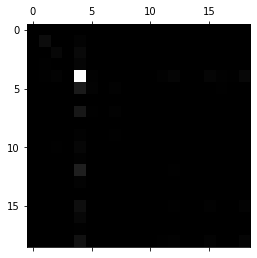

In [63]:
import matplotlib.pyplot as plt
conf_mx = confusion_matrix(y_train, y_train_pred)
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show

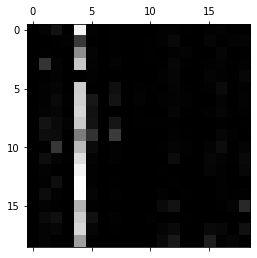

In [64]:
row_sums = conf_mx.sum(axis=1, keepdims = True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [65]:
some_data = X_train[0].toarray()
some_data

array([[0., 0., 0., ..., 0., 0., 0.]])

In [66]:
some_scores = sgd_clf.decision_function(some_data)
some_scores

array([[-1.01303903, -1.03113711, -1.01835186, -1.00751072,  1.01020418,
        -1.01047631, -1.00969124, -1.01107885, -1.02185526, -1.02435552,
        -1.00077858, -1.01288804, -1.01815922, -1.009468  , -1.01450166,
        -1.01091175, -1.01480666, -1.01106087, -0.99915284]])

In [67]:
np.argmax(some_scores)

4

In [68]:
sgd_clf.classes_[np.argmax(some_scores)]

'Going Straight Ahead'

In [69]:
some_data_label

'Passing'

In [77]:
test_score = cross_val_score(sgd_clf, X_test, y_test, cv=3, scoring="accuracy")
test_score

array([0.56487106, 0.5625836 , 0.57841431])

In [87]:
sgd_clf.predict(some_data)

array(['Going Straight Ahead'], dtype='<U26')

In [88]:
from sklearn.base import BaseEstimator
class alwaysGoing(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return sgd_clf.predict(some_data)

In [89]:
alwaysGoing_clf = alwaysGoing()
cross_val_score(alwaysGoing_clf, X_test, y_test, cv=3, scoring="accuracy")

c:\users\john\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\john\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\john\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\john\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "c:\users\john\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\john

array([nan, nan, nan])

In [71]:
#from sklearn.svm import SVC
#svm_clf = SVC()
#svm_clf.fit(X_train, y_train)

In [72]:
#some_data = X_train[0].toarray()
#some_data

In [73]:
#some_scores = svm_clf.decision_function(some_data)
#some_scores

In [74]:
#np.argmax(some_scores)

In [75]:
#svm_clf.classes_[np.argmax(some_scores)]

In [76]:
#some_data_label